In [306]:
import numpy as np
from matplotlib import pyplot
import matplotlib

from L7.zad1 import generate_data

# import L7.zad1
# from importlib import reload
# reload(L7.zad1)

In [231]:
mi = np.array([3, 5])
sigma = np.array([[12, 3], [3, 1]])
data = generate_data(1000, mi, sigma)

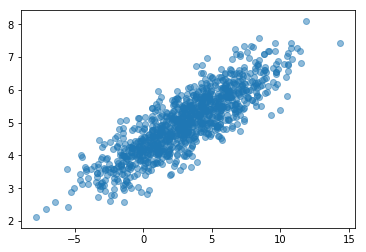

In [232]:
pyplot.scatter(*data.T, alpha=0.5)
pyplot.show()

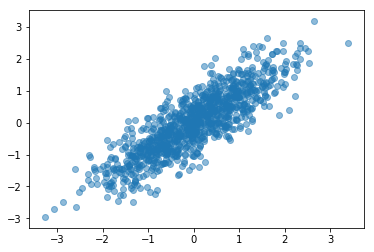

In [233]:
data_standardized = (data - data.mean(axis=0, keepdims=True)) / data.std(axis=0, keepdims=True)
pyplot.scatter(*data_standardized.T, alpha=0.5)
pyplot.show()

In [234]:
covariance = np.cov(data_standardized.T)
print(covariance)

[[ 1.001001    0.85246899]
 [ 0.85246899  1.001001  ]]


In [235]:
eigenvalues, eigenvectors = np.linalg.eig(covariance)
print(eigenvalues, eigenvectors, sep="\n\n")

[ 1.85346999  0.14853201]

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [236]:
data_pca = (data_standardized @ eigenvectors) / np.sqrt(eigenvalues)
print(data_pca)

[[-0.48470696  0.16707899]
 [ 0.66997502 -0.24369124]
 [-0.11540683 -0.36651342]
 ..., 
 [-2.03138462  1.31047031]
 [-1.12642128 -0.15256818]
 [-0.08691776  0.76932267]]


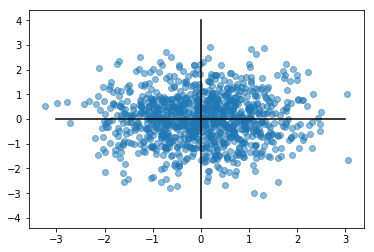

In [238]:
pyplot.scatter(*data_pca.T, alpha=0.5)
lines = np.array([[-3, 0], [3, 0]]), np.array([[0, -4], [0, 4]])
pyplot.plot(*lines[0].T, "k")
pyplot.plot(*lines[1].T, "k")
pyplot.show()

In [239]:
de_pca_lines = (lines[0] * np.sqrt(eigenvalues) @ np.linalg.inv(eigenvectors),
                lines[1] * np.sqrt(eigenvalues) @ np.linalg.inv(eigenvectors))

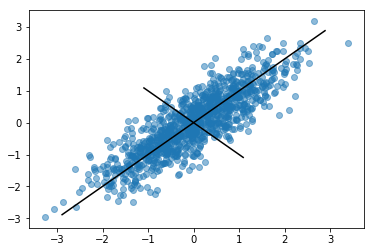

In [240]:
pyplot.scatter(*data_standardized.T, alpha=0.5)
pyplot.plot(*de_pca_lines[0].T, "k")
pyplot.plot(*de_pca_lines[1].T, "k")
pyplot.show()

In [241]:
destandardized_lines = (de_pca_lines * data.std(axis=0, keepdims=True) 
                        + data.mean(axis=0, keepdims=True))

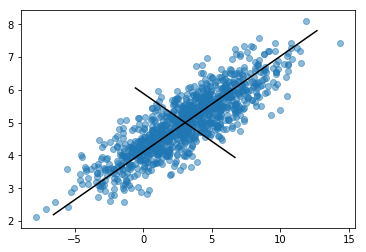

In [242]:
pyplot.scatter(*data.T, alpha=0.5)
pyplot.plot(*destandardized_lines[0].T, "k")
pyplot.plot(*destandardized_lines[1].T, "k")
pyplot.show()

In [243]:
print("mean",
      data.mean(axis=0, keepdims=True),
      data_standardized.mean(axis=0, keepdims=True),
      data_pca.mean(axis=0, keepdims=True), sep="\n")

mean
[[ 3.05823886  4.99813263]]
[[ -8.39495140e-16  -3.02896597e-15]]
[[ -2.01970385e-15  -4.07562872e-15]]


In [244]:
print("std",
      data.std(axis=0, keepdims=True),
      data_standardized.std(axis=0, keepdims=True),
      data_pca.std(axis=0, keepdims=True), sep="\n")

std
[[ 3.32207151  0.97111678]]
[[ 1.  1.]]
[[ 0.99949987  0.99949987]]


In [245]:
print("covariance matrix",
      np.cov(data.T),
      np.cov(data_standardized.T),
      np.cov(data_pca.T), sep="\n\n")

covariance matrix

[[ 11.04720634   2.75016674]
 [  2.75016674   0.94401181]]

[[ 1.001001    0.85246899]
 [ 0.85246899  1.001001  ]]

[[  1.00000000e+00  -2.80056258e-16]
 [ -2.80056258e-16   1.00000000e+00]]


In [246]:
print("correlation matrix",
      np.corrcoef(data.T),
      np.corrcoef(data_standardized.T),
      np.corrcoef(data_pca.T), sep="\n\n")

correlation matrix

[[ 1.          0.85161652]
 [ 0.85161652  1.        ]]

[[ 1.          0.85161652]
 [ 0.85161652  1.        ]]

[[  1.00000000e+00  -2.80056258e-16]
 [ -2.80056258e-16   1.00000000e+00]]


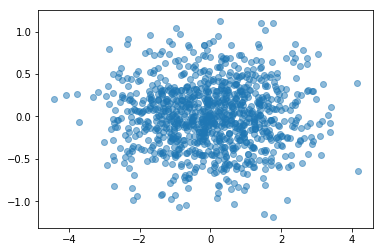

In [247]:
data_pca_sqrt = (data_standardized @ eigenvectors)
pyplot.scatter(*data_pca_sqrt.T, alpha=0.5)
pyplot.show()

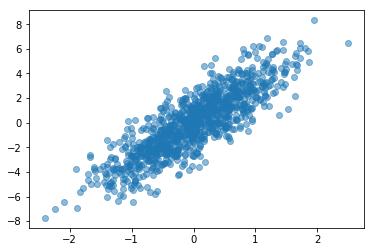

In [248]:
pyplot.scatter(*(data_standardized / np.sqrt(eigenvalues)).T, alpha=0.5)
pyplot.show()

In [249]:
from L3 import zad1

In [250]:
number = 1000
dimension = 2
distributions_number = 3
probabilities = None
mi = np.array([[-21, -2], [3, 5], [27, 12]])
sigma = np.array([np.array([[12, 3], [3,1]])] * distributions_number)

mixed_data = zad1.generate_data(number, dimension, distributions_number, probabilities, mi, sigma)

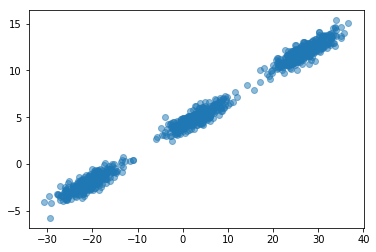

In [251]:
pyplot.scatter(*mixed_data.T, alpha=0.5)
pyplot.show()

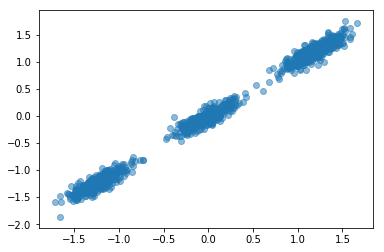

In [252]:
mixed_data_standardized = ((mixed_data - mixed_data.mean(axis=0, keepdims=True))
                           / mixed_data.std(axis=0, keepdims=True))
pyplot.scatter(*mixed_data_standardized.T, alpha=0.5)
pyplot.show()

In [253]:
mixed_data_covariance = np.cov(mixed_data_standardized.T)
print(mixed_data_covariance)

[[ 1.001001    0.99692981]
 [ 0.99692981  1.001001  ]]


In [254]:
eigenvalues_md, eigenvectors_md = np.linalg.eig(mixed_data_covariance)
print(eigenvalues_md, eigenvectors_md, sep="\n\n")

[ 1.99793081  0.00407119]

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [255]:
mixed_data_pca = ((mixed_data_standardized @ eigenvectors_md) 
                  / np.sqrt(eigenvalues_md))
print(mixed_data_pca)

[[-0.04323939  0.61195312]
 [-0.00402548  0.68555033]
 [-0.10384957  0.91833433]
 ..., 
 [-0.34955238 -0.6008283 ]
 [ 0.01772879  0.73106058]
 [-1.25205266  0.27471066]]


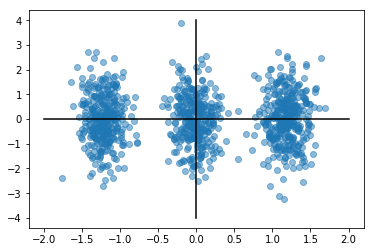

In [257]:
pyplot.scatter(*mixed_data_pca.T, alpha=0.5)
lines_mixed_data = np.array([[-2, 0], [2, 0]]), np.array([[0, -4], [0, 4]])
pyplot.plot(*lines_mixed_data[0].T, "k")
pyplot.plot(*lines_mixed_data[1].T, "k")
pyplot.show()

In [258]:
de_pca_lines_md = (lines_mixed_data[0] * np.sqrt(eigenvalues_md) @ np.linalg.inv(eigenvectors_md),
                   lines_mixed_data[1] * np.sqrt(eigenvalues_md) @ np.linalg.inv(eigenvectors_md))

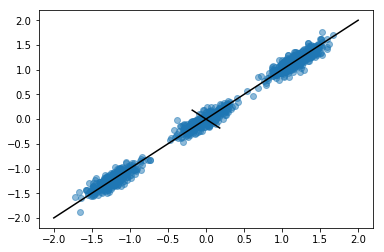

In [259]:
pyplot.scatter(*mixed_data_standardized.T, alpha=0.5)
pyplot.plot(*de_pca_lines_md[0].T, "k")
pyplot.plot(*de_pca_lines_md[1].T, "k")
pyplot.show()

In [260]:
destandardized_lines_md = (de_pca_lines_md * mixed_data.std(axis=0, keepdims=True) 
                           + mixed_data.mean(axis=0, keepdims=True))

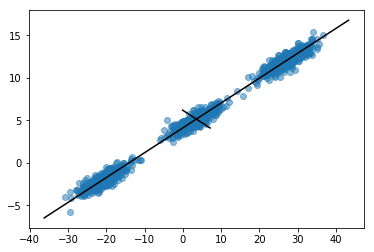

In [261]:
pyplot.scatter(*mixed_data.T, alpha=0.5)
pyplot.plot(*destandardized_lines_md[0].T, "k")
pyplot.plot(*destandardized_lines_md[1].T, "k")
pyplot.show()

In [262]:
mixed_data_pca_sqrt = (mixed_data_standardized @ eigenvectors_md)
print(mixed_data_pca_sqrt)

[[-0.0611181   0.03904621]
 [-0.00568994  0.04374214]
 [-0.14678948  0.05859513]
 ..., 
 [-0.49408593 -0.03833638]
 [ 0.02505932  0.04664597]
 [-1.76975366  0.01752816]]


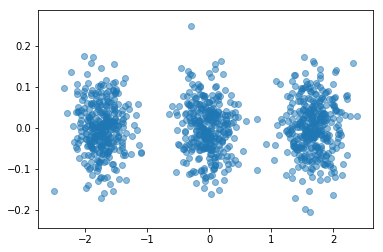

In [263]:
pyplot.scatter(*mixed_data_pca_sqrt.T, alpha=0.5)
pyplot.show()

In [264]:
from sklearn import datasets
iris = datasets.load_iris()
iris_data = np.array(iris.data)

In [265]:
iris_data_standardized = ((iris_data - iris_data.mean(axis=0, keepdims=True))
                          / iris_data.std(axis=0, keepdims=True))

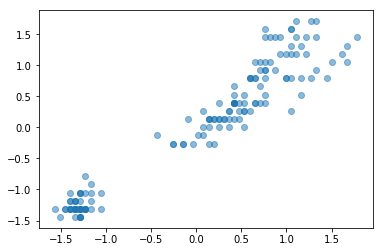

In [266]:
pyplot.scatter(*iris_data_standardized.T[2:], alpha=0.5)
pyplot.show()

In [267]:
iris_covariance = np.cov(iris_data_standardized.T)
print(iris_covariance)

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [268]:
iris_eigenvalues, iris_eigenvectors = np.linalg.eig(iris_covariance)
print(iris_eigenvalues, iris_eigenvectors, sep="\n\n")

[ 2.93035378  0.92740362  0.14834223  0.02074601]

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [269]:
iris_data_pca = (iris_data_standardized @ iris_eigenvectors) / np.sqrt(iris_eigenvalues)
print(iris_data_pca)

[[ -1.32287954e+00  -5.25124053e-01  -3.16610794e-01   1.60192737e-01]
 [ -1.21882921e+00   6.80573723e-01  -5.90028631e-01   7.16550919e-01]
 [ -1.38328791e+00   3.30707545e-01   1.33660465e-01   1.93184088e-01]
 [ -1.34604509e+00   5.97463108e-01   2.56678896e-01  -4.60385112e-01]
 [ -1.39545447e+00  -7.00679960e-01   5.56347550e-02  -2.59640696e-01]
 [ -1.20954750e+00  -1.57686419e+00   7.96678750e-02   3.05396749e-02]
 [ -1.42871357e+00  -7.74260470e-02   8.88473766e-01  -2.64495633e-01]
 [ -1.30494557e+00  -2.57122855e-01  -2.14394366e-01  -1.77076430e-01]
 [ -1.36810369e+00   1.13720241e+00   3.98705742e-01  -1.86023345e-01]
 [ -1.27856084e+00   4.65857398e-01  -6.40161252e-01  -2.77067158e-01]
 [ -1.26384604e+00  -1.11170882e+00  -6.85467628e-01   1.06232252e-01]
 [ -1.35958652e+00  -1.64677564e-01   2.60067611e-01  -9.34179029e-01]
 [ -1.29924457e+00   7.36349867e-01  -5.79548830e-01   1.82637420e-02]
 [ -1.54204561e+00   9.74314089e-01   4.92195096e-01  -1.34842571e-01]
 [ -1.

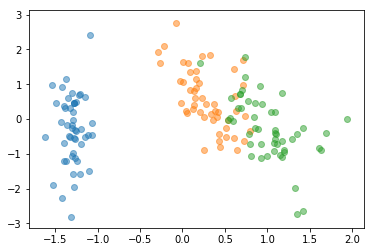

In [273]:
reduced_data = iris_data_pca.T[:2]

for target in set(iris.target):
    correct_target = (target == iris.target)
    pyplot.scatter(reduced_data[0][correct_target], reduced_data[1][correct_target], 
                   alpha=0.5)
pyplot.show()

In [276]:
pca_matrix = (np.identity(4) @ iris_eigenvectors) / np.sqrt(iris_eigenvalues)
print(pca_matrix)
pca_inverse_matrix = np.linalg.inv(pca_matrix)
print(pca_inverse_matrix)

[[ 0.30515434 -0.38661621 -1.87203081  1.81897463]
 [-0.1538443  -0.96109991  0.62840838 -0.86183921]
 [ 0.33955172 -0.02190486  0.36580929 -5.5622284 ]
 [ 0.33041356 -0.06792788  1.64558682  3.63486042]]
[[ 0.89421016 -0.45081822  0.99500666  0.96822861]
 [-0.35854928 -0.89132754 -0.02031465 -0.06299656]
 [-0.27770122  0.0932195   0.05426497  0.24411001]
 [ 0.03773647 -0.01787973 -0.11539407  0.07540887]]


In [274]:
print(np.identity(4))

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [282]:
print(iris_data_standardized[0])

[-0.90068117  1.03205722 -1.3412724  -1.31297673]


In [278]:
print(iris_data_pca[0])

[-1.32287954 -0.52512405 -0.31661079  0.16019274]


In [285]:
print(iris_data_pca[0] @ pca_inverse_matrix)

ValueError: shapes (2,) and (4,4) not aligned: 2 (dim 0) != 4 (dim 0)

In [283]:
print(iris_data_standardized[0] @ pca_matrix)

[-1.32287954 -0.52512405 -0.31661079  0.16019274]


In [288]:
reduced_data_4d = iris_data_pca * np.array([1, 1, 0, 0])

In [290]:
de_pca_iris_data = reduced_data_4d @ pca_inverse_matrix
de_pca_iris_data = de_pca_iris_data * iris_data.std(axis=0, keepdims=True) + iris_data.mean(axis=0, keepdims=True)

In [292]:
print(iris_data - de_pca_iris_data)

[[ 0.07755217 -0.01399226 -0.06271999 -0.04959796]
 [ 0.15754323 -0.02930555 -0.20170964 -0.06845331]
 [-0.02461675  0.00389177 -0.0264469   0.03589761]
 [-0.07316573  0.01389742  0.11791709  0.0212521 ]
 [-0.02083701  0.00424737  0.05799632 -0.00456231]
 [-0.01730773  0.00297341  0.0014052   0.01654385]
 [-0.21186423  0.03783538  0.13845643  0.14979507]
 [ 0.04362158 -0.00726856  0.01547412 -0.04996384]
 [-0.09717175  0.017499    0.07579567  0.06335922]
 [ 0.13808778 -0.02364776 -0.00486483 -0.13475248]
 [ 0.16040888 -0.02843453 -0.08696885 -0.12117978]
 [-0.0886982   0.01769478  0.21438454 -0.00529407]
 [ 0.13339396 -0.02348795 -0.05901048 -0.10655911]
 [-0.11700434  0.02086971  0.07433124  0.08365326]
 [ 0.32105135 -0.05944633 -0.38792146 -0.14955684]
 [-0.00921132  0.00088212 -0.05831518  0.03448376]
 [ 0.04116582 -0.01015436 -0.26327432  0.07366235]
 [ 0.04285074 -0.00896917 -0.13904889  0.01798253]
 [ 0.23348427 -0.04197071 -0.17572276 -0.15502169]
 [-0.09038311  0.01650959  0.09

In [296]:
print(np.sum((iris_data - de_pca_iris_data)**2))

21.3409559517


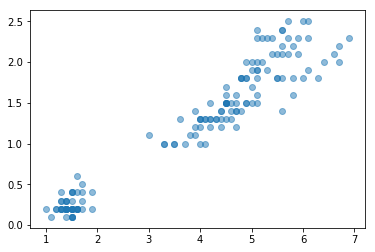

In [297]:
pyplot.scatter(*iris_data.T[2:], alpha=0.5)
pyplot.show()

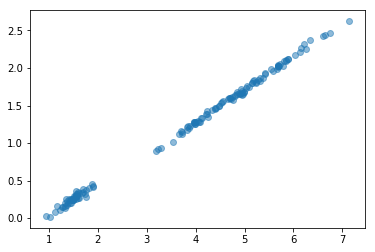

In [298]:
pyplot.scatter(*de_pca_iris_data.T[2:], alpha=0.5)
pyplot.show()

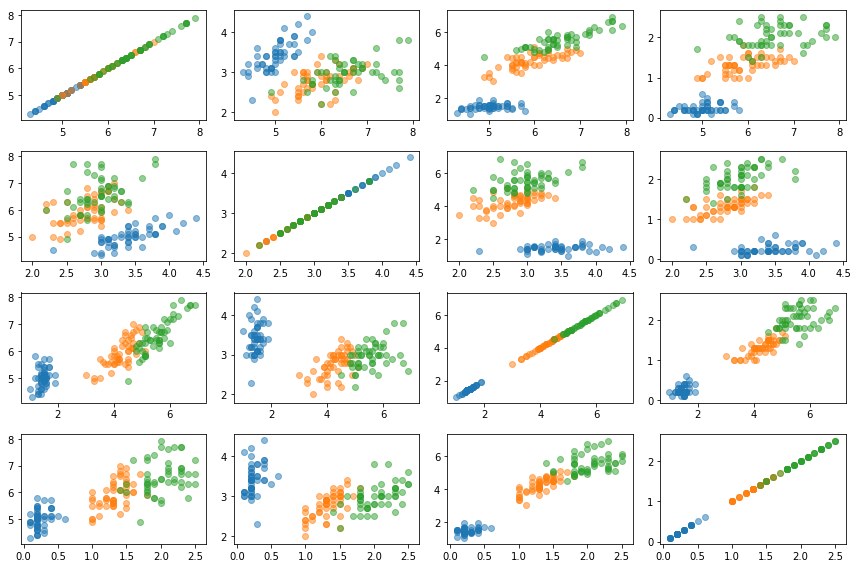

In [309]:
dimension = 4
matplotlib.rcParams['figure.figsize'] = [12., 8.]
for i in range(dimension):
    for j in range(dimension):
        pyplot.subplot(dimension, dimension, i*dimension+j+1)
        for target in set(iris.target):
            correct_target = (target == iris.target)
            pyplot.scatter(iris_data.T[i][correct_target],
                           iris_data.T[j][correct_target],
                           alpha=0.5)
pyplot.tight_layout()
pyplot.show()

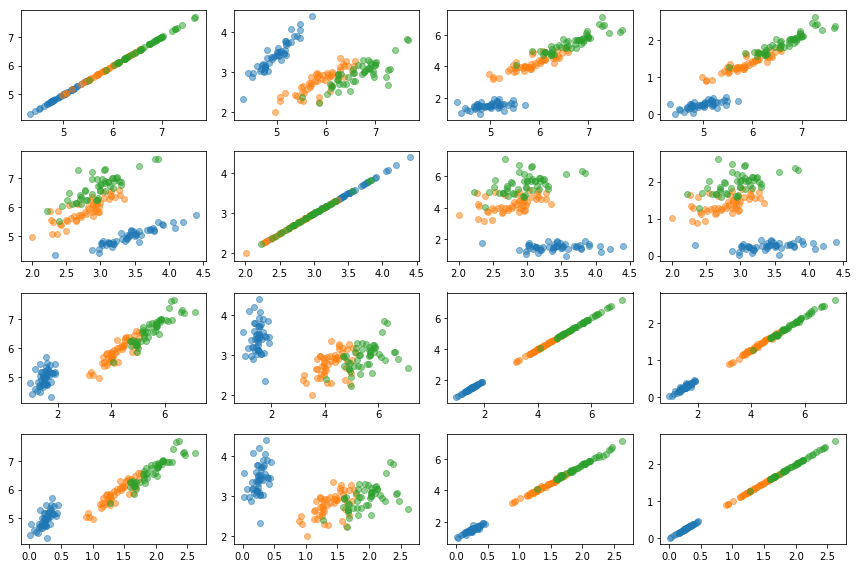

In [310]:
dimension = 4
matplotlib.rcParams['figure.figsize'] = [12., 8.]
for i in range(dimension):
    for j in range(dimension):
        pyplot.subplot(dimension, dimension, i*dimension+j+1)
        for target in set(iris.target):
            correct_target = (target == iris.target)
            pyplot.scatter(de_pca_iris_data.T[i][correct_target],
                           de_pca_iris_data.T[j][correct_target],
                           alpha=0.5)
pyplot.tight_layout()
pyplot.show()